In [1]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ASUS\Desktop\tfenv\tfenv\Scripts\python.exe -m pip install --upgrade pip


In [20]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
from keras import regularizers
from sklearn.metrics import mean_squared_error

In [12]:
csvFilePath = '/Users/ASUS/Documents/Stock-Prediction-using-News-Info-Sentiment-master/data/stocks2023/hbl_feat.csv'
df = pd.read_csv(csvFilePath)

In [40]:
df

,Date,Open,High,Low,Close,Volume,feature1,feature2,feature3,feature4,feature5
0,01-Oct-2015,198.00,200.50,196.80,197.87,426600,0.312187,0.163488,0.167254,0.178624,0.178447
1,02-Oct-2015,199.00,200.00,198.00,198.27,370300,0.299259,0.175934,0.165843,0.174329,0.184635
2,05-Oct-2015,198.03,198.51,197.11,198.01,47900,0.277948,0.170541,0.171659,0.191485,0.188367
3,06-Oct-2015,199.90,204.49,199.00,203.25,157300,0.327915,0.163137,0.156347,0.172104,0.180497
4,07-Oct-2015,203.00,204.65,202.00,204.00,130400,0.344828,0.175881,0.167450,0.156289,0.155552
...,...,...,...,...,...,...,...,...,...,...,...
2016,20-Nov-2023,97.50,97.69,95.82,96.43,405567,0.345035,0.188403,0.156004,0.158824,0.151734
2017,21-Nov-2023,97.00,97.70,96.65,96.75,1664356,0.352733,0.194080,0.170421,0.152933,0.129834
2018,22-Nov-2023,96.05,97.75,96.05,97.12,1455934,0.339745,0.170183,0.170510,0.165477,0.154085
2019,23-Nov-2023,96.50,98.40,96.10,96.91,3262230,0.370192,0.183512,0.150973,0.139724,0.155599


In [49]:
def createDataset(dataset, target, lookBack=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - lookBack):
        a = dataset[i:(i + lookBack), :]
        dataX.append(a)
        dataY.append(target[i + lookBack])
    return np.array(dataX), np.array(dataY)
#enddef

In [50]:
features = df.drop(['Date', 'Close'], axis=1).values
target = df['Close'].values

scalerFeatures = MinMaxScaler(feature_range=(0, 1))
scalerTarget = MinMaxScaler(feature_range=(0, 1))

featuresScaled = scalerFeatures.fit_transform(features)
targetScaled = scalerTarget.fit_transform(target.reshape(-1, 1))

lookBack = 3
X, y = createDataset(featuresScaled, targetScaled, lookBack)
print(X[:2])
print(y[:2])

trainSize = int(len(X) * 0.8)
testSize = len(X) - trainSize
trainX, testX = X[0:trainSize, :], X[trainSize:len(X), :]
trainY, testY = y[0:trainSize], y[trainSize:len(y)]

trainX = np.reshape(trainX, (trainX.shape[0], lookBack, trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], lookBack, testX.shape[2]))

[[[0.55138989 0.54960317 0.55631951 0.01338521 0.665256   0.35111637
   0.36853442 0.32548157 0.51854583]
  [0.55539534 0.54761905 0.5611729  0.01159649 0.6239853  0.44725232
   0.35257396 0.30393062 0.55119562]
  [0.55151005 0.54170635 0.55757331 0.00135345 0.55595326 0.4055975
   0.41837064 0.39001635 0.57088665]]

 [[0.55539534 0.54761905 0.5611729  0.01159649 0.6239853  0.44725232
   0.35257396 0.30393062 0.55119562]
  [0.55151005 0.54170635 0.55757331 0.00135345 0.55595326 0.4055975
   0.41837064 0.39001635 0.57088665]
  [0.55900024 0.56543651 0.56521739 0.00482922 0.71546564 0.34840194
   0.24514347 0.29276543 0.52936289]]]
[[0.57643274]
 [0.57944902]]


In [51]:
batchSize = 1
epoch = 20
neurons = 100
dropout = 0.6

model = Sequential()
model.add(LSTM(neurons, return_sequences=True, activation='tanh', input_shape=(lookBack, features.shape[1])))
model.add(Dropout(dropout))
model.add(LSTM(neurons, return_sequences=True, activation='tanh'))
model.add(Dropout(dropout))
model.add(LSTM(neurons, activation='tanh'))
model.add(Dropout(dropout))

model.add(Dense(units=1, activation='linear', activity_regularizer=regularizers.l1(0.00001)))
model.add(Activation('tanh'))
model.summary()

model.compile(loss='mean_squared_error' , optimizer='RMSprop')

model.fit(trainX, trainY, epochs=epoch, batch_size=batchSize, verbose=1, validation_split=0.2)

C:\Users\ASUS\Desktop\tfenv\tfenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 3, 100)              │          44,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 3, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 3, 100)              │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 3, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204,901 (800.39 KB)

 Trainable params: 204,901 (800.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 0.0279 - val_loss: 4.4770e-04
Epoch 2/20
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0048 - val_loss: 2.8760e-04
Epoch 3/20
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0032 - val_loss: 2.7183e-04
Epoch 4/20
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0029 - val_loss: 2.0976e-04
Epoch 5/20
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0026 - val_loss: 3.5841e-04
Epoch 6/20
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0024 - val_loss: 6.5285e-04
Epoch 7/20
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0020 - val_loss: 6.6929e-04
Epoch 8/20
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0023 - val_loss: 2.3436e-04
Epoch 9/20
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0022 - val_loss: 2.2663e-04
Epoch 10/20
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0023 - val_loss: 4.9974e-04
Epoch 11/20
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0020 - val_lo

In [52]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredictInv = scalerTarget.inverse_transform(trainPredict)
trainYInv = scalerTarget.inverse_transform(np.reshape(trainY, (trainY.shape[0], 1)))
testPredictInv = scalerTarget.inverse_transform(testPredict)
testYInv = scalerTarget.inverse_transform(np.reshape(testY, (testY.shape[0], 1)))

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [54]:
trainScore = np.sqrt(mean_squared_error(trainYInv[:, 0], trainPredictInv[:, 0]))
print(f'Training RMSE: {trainScore}')
testScore = np.sqrt(mean_squared_error(testYInv[:, 0], testPredictInv[:, 0]))
print(f'Testing RMSE: {testScore}')

trainAccuracy = 100 - (trainScore / np.mean(trainYInv) * 100)
testAccuracy = 100 - (testScore / np.mean(testYInv) * 100)

print(f'Training Accuracy: {trainAccuracy:.2f}%')
print(f'Testing Accuracy: {testAccuracy:.2f}%')

Training RMSE: 7.824877014387672
Testing RMSE: 17.036216903073935
Training Accuracy: 95.26%
Testing Accuracy: 79.61%


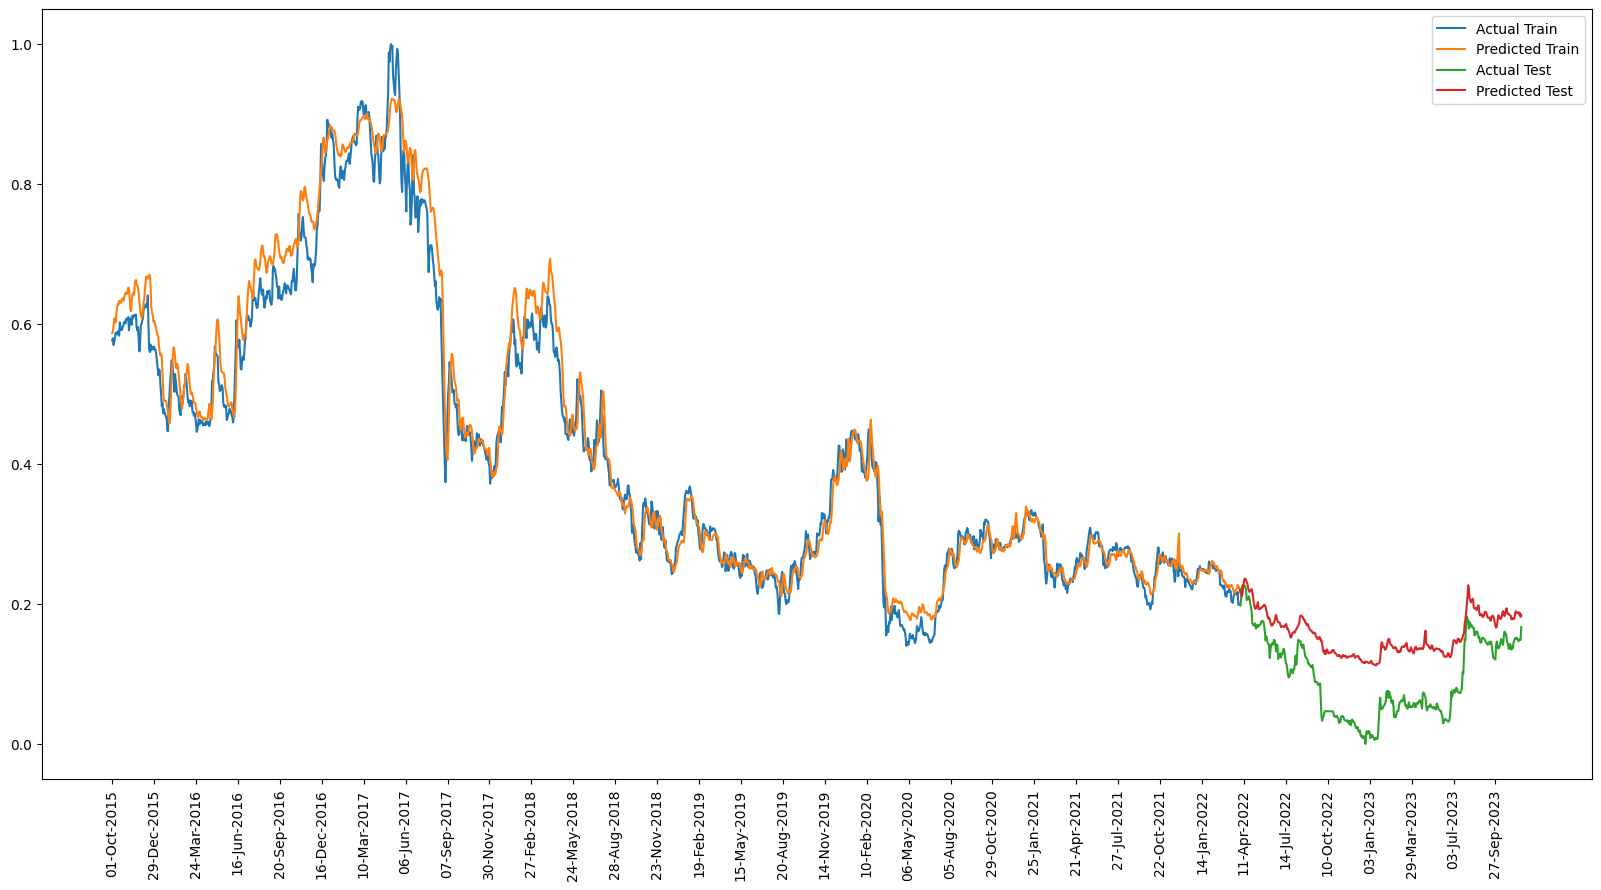

In [55]:
dates = df['Date'].values
sampleInterval = 60
sampledDates = dates[::sampleInterval]

plt.figure(figsize=(20, 10))
plt.plot(dates[:len(trainY)], trainY, label='Actual Train')
plt.plot(dates[:len(trainPredict)], trainPredict, label='Predicted Train')
plt.plot(dates[len(trainY):len(trainY) + len(testY)], testY, label='Actual Test')
plt.plot(dates[len(trainPredict):len(trainPredict) + len(testPredict)], testPredict, label='Predicted Test')

plt.xticks(sampledDates, rotation=90)

plt.legend()
plt.show()

In [57]:
from sklearn.metrics import r2_score

# Actual values
actual = trainY

# Predicted values
predicted = trainPredict

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9752514564287954


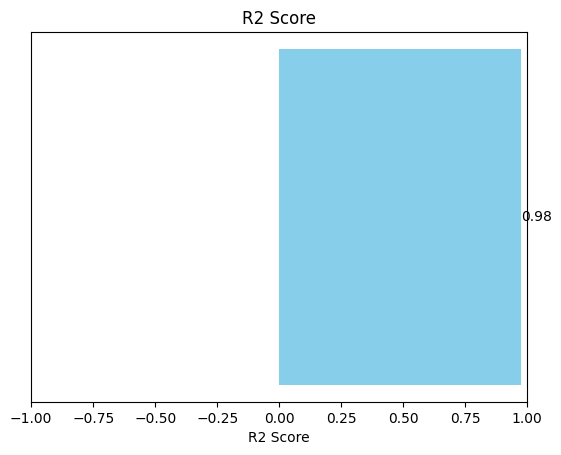

In [58]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

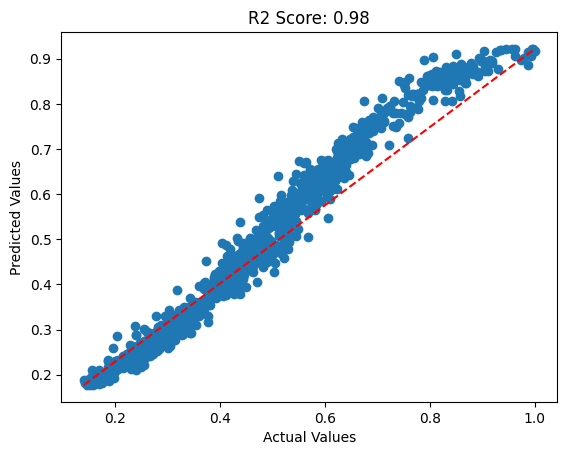

In [59]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()

In [31]:
###Lstm 

In [33]:
### EVALUATION###

In [34]:
# CALCULATE R2 VALUE

In [37]:
## VALUES AGAINST PREDICTED